<a href="https://colab.research.google.com/github/ssupsandeep/Nerural-networks-and-deep-learning/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Double Digit Recognition


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 98s 114ms/step - left_digit_accuracy: 0.8538 - left_digit_loss: 0.4676 - loss: 0.9444 - right_digit_accuracy: 0.8465 - right_digit_loss: 0.4768 - val_left_digit_accuracy: 0.9817 - val_left_digit_loss: 0.0638 - val_loss: 0.1448 - val_right_digit_accuracy: 0.9743 - val_right_digit_loss: 0.0809
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 94s 112ms/step - left_digit_accuracy: 0.9808 - left_digit_loss: 0.0605 - loss: 0.1182 - right_digit_accuracy: 0.9815 - right_digit_loss: 0.0577 - val_left_digit_accuracy: 0.9825 - val_left_digit_loss: 0.0573 - val_loss: 0.1085 - val_right_digit_accuracy: 0.9872 - val_right_digit_loss: 0.0511
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 100s 119ms/step - left_digit_accuracy: 0.9871 - left_digit_loss: 0.0411 - loss: 0.0738 - right_digit_accuracy: 0.9896 - right_digit_loss: 0.0327 - val_left_digit_accuracy: 0.9862 - val_left_digit_loss: 0.0504 - val_loss: 0.1035 - val_right_digit_accuracy: 0.9858 - val_right_digit_loss: 0.0531
Epo

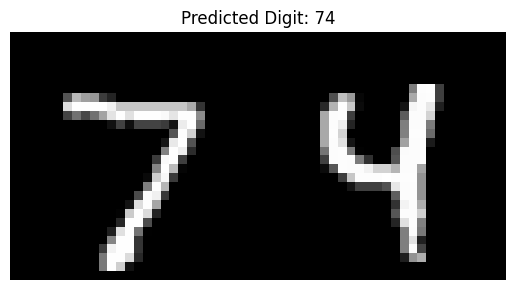

In [ ]:

# Imports

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


# Load MNIST dataset

# x_train, x_test: images (28x28 grayscale)
# y_train, y_test: digit labels (0–9)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Create double-digit images

def create_double_digit(images, labels):
    """
    Creates images with two digits side-by-side.
    Returns:
        X  -> combined images (28x56x1)
        y1 -> left digit labels
        y2 -> right digit labels
    """
    X, y1, y2 = [], [], []

    for i in range(len(images)):
        # Randomly choose a second image
        j = np.random.randint(0, len(images))

        # Concatenate images horizontally (left + right)
        img = np.concatenate([images[i], images[j]], axis=1)
        X.append(img)

        # Store labels for each digit
        y1.append(labels[i])
        y2.append(labels[j])

    # Convert to NumPy array and add channel dimension
    X = np.array(X)[..., np.newaxis]

    return X, np.array(y1), np.array(y2)

# Generate training and testing data
X_train, y_left_train, y_right_train = create_double_digit(x_train, y_train)
X_test, y_left_test, y_right_test = create_double_digit(x_test, y_test)


# Build the CNN model

inputs = layers.Input(shape=(28, 56, 1))  # Two MNIST digits side by side

# First convolution block
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.MaxPooling2D()(x)

# Second convolution block
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D()(x)

# Fully connected layers
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)

# Output heads (multi-output model)
left = layers.Dense(10, activation='softmax', name='left_digit')(x)
right = layers.Dense(10, activation='softmax', name='right_digit')(x)

# Define the model
model = models.Model(inputs, [left, right])


# Compile the model

model.compile(
    optimizer='adam',
    loss={
        'left_digit': 'sparse_categorical_crossentropy',
        'right_digit': 'sparse_categorical_crossentropy'
    },
    metrics={
        'left_digit': 'accuracy',
        'right_digit': 'accuracy'
    }
)


# Train the model

model.fit(
    X_train,
    {
        'left_digit': y_left_train,
        'right_digit': y_right_train
    },
    epochs=5,
    batch_size=64,
    validation_split=0.1
)


# Test on one image

idx = 0  # Change index to test different samples
image = X_test[idx:idx+1]

# Predict both digits
pred_left, pred_right = model.predict(image)

# Convert probabilities to digit predictions
d1 = np.argmax(pred_left)
d2 = np.argmax(pred_right)

# Combine digits into a two-digit number
predicted_digit = d1 * 10 + d2


# Display result
plt.imshow(image[0].squeeze(), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis('off')
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 45s 52ms/step - accuracy: 0.8840 - loss: 0.3942 - val_accuracy: 0.9845 - val_loss: 0.0522
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.9818 - loss: 0.0565 - val_accuracy: 0.9843 - val_loss: 0.0524
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.9882 - loss: 0.0374 - val_accuracy: 0.9895 - val_loss: 0.0376
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9920 - loss: 0.0254 - val_accuracy: 0.9887 - val_loss: 0.0361
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9940 - loss: 0.0190 - val_accuracy: 0.9918 - val_loss: 0.0330
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9886 - loss: 0.0360
Test accuracy: 0.9912999868392944
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


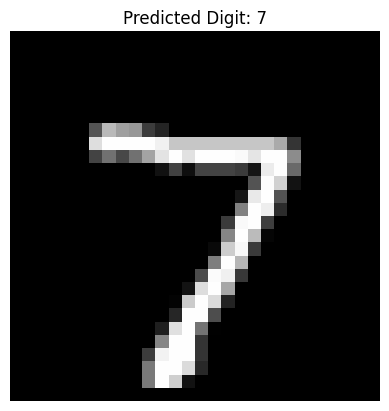

In [10]:
!pip install tensorflow matplotlib
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add channel dimension (required for CNN)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 digits (0–9)
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", test_accuracy)
import numpy as np

# Pick a random test image
index = 0
image = x_test[index]

prediction = model.predict(image[np.newaxis, ...])
predicted_digit = np.argmax(prediction)

plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis('off')
plt.show()